In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from copy import deepcopy
%matplotlib inline

#**K nearest Neighbor** 

1

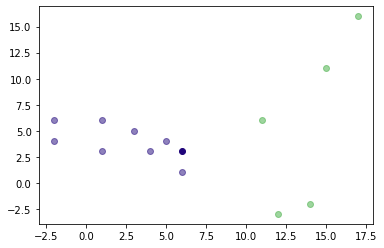

In [2]:
class K_classifier(object):
    
    def __init__(self, X, targets, k = 3, classes = 2):
    
        self.k = k
        self.X = X
        self.targets = targets
        self.classes = classes
        
        self.color_dict = {}

        for i in range(self.classes):
            self.color_dict.update({str(i) : self.random_color()})

    def fit(self):

        #no training due to algorithm (all is done in predict) 
    
        return self

    def random_color(self):
        
        color_list = []
        #rgb -> 3 colors
        for i in range(3):
            color_list.append(random.random())

        color_tuple = tuple(color_list)
    
        return color_tuple

    def distance(self, vektor1, vektor2):
        
        #computes the distance between two vectors
    
        diff_vector = vektor1 - vektor2
        quad_sum = 0
    
        for coordinate in diff_vector:
            quad_sum += coordinate**2

        quad_sum = math.sqrt(quad_sum)
    
        return quad_sum

    def find_smallest(self, search_list):
        
        value = search_list[0][0]
        position = 0
        index = 1
        while index < len(search_list):
            #smaller value available
            if value > search_list[index][0]:
                value = search_list[index][0]
                position = index

            index += 1

        return position


    def sort(self,to_be_sorted):

        #sorts the distance list
        sorted_list = []
        copy = deepcopy(to_be_sorted)

        for i in range(len(copy)):
            #find smallest difference available
            index = self.find_smallest(copy)
            #append to sorted
            sorted_list.append([copy[index][0], copy[index][1]])
            #remove from old list
            copy.pop(index)

        return sorted_list

    def get_k(self, k_list):

        assert self.k < self.X.shape[0]
      
    
        copy = deepcopy(k_list)
        #we're only interested in first k smallest samples
        copy = copy[:self.k]
    
        #count all classes by just extracting classes
        count_list = []
        for element in copy:
            #element = [distance, class]
            count_list.append(element[1])

        index = 0
        mapping = []
    
        for element in count_list:
            number = count_list.count(element)
            mapping.append(number)

        #now we have two lists: 
        #count lists contains the classes, e.g. [0,1,1,1]
        #mapping contains the number of times the each class in count list is represented, e.g.
        #[1,3,3,3]
    
        maximum = mapping[0]
        index = 1
        position = 0
        
        while index < len(mapping):
            if mapping[index] > maximum:
                maximum = mapping[index]
                position = index

            index += 1 

        max_class = count_list[position]
    
        return max_class

    

    def predict(self, input):

        #compute ALL distance to new input
        distances = []
        for i in range(len(self.X)):
            d = self.distance(self.X[i], input)
            #maps calculated distance to original input
            distances.append([d, self.targets[i]])

        distances = self.sort(distances)

        #gets the closest class based on k
        max_class = self.get_k(distances)
        
        color = self.color_dict[str(max_class)]

        self.plot(0,1,color,input)


        return max_class

    def plot(self, feature1, feature2,specified_color=None,input=None):

        for i in range(len(self.X)):
            plt.scatter(self.X[i][feature1], self.X[i][feature2], facecolor = self.color_dict[str(self.targets[i])], alpha = .5)
    

        if specified_color != None:
            plt.scatter(input[0],input[1],color=specified_color)



hallo = np.array([[1,3],[-2,4],[3,5],[-2,6],[4,3],[6,1],[1,6],[5,4],[12,-3],[11,6],[17,16],[14,-2],[15,11]])
bibo = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0])
k = K_classifier(k=3, X=hallo, targets=bibo, classes = 2)
k.predict(np.array([6,3]))

In [ ]:
#you can see that the predicted point (6,3) is colored a little brighter than all the other colors for emphasis